## Sarcasm Detector - Final Project
Course: Natural Language Processing <br>
Team members: Islam-Bek K., Haeun L., Jeyeong P.


### Questions to be answered

What is Sarcasm?
* Sarcasm is the act of complaining, mocking. Often it is a hostility disguised as humour. Used rarely and differs by regions and cultures. 
* The term "sarkasmos" came from Greek meaning "to tear flesh, bite the lip in rage, sneer"

Why is Sarcasm?
* Sarcasm is the narrow field in Natural Language Processing, since it focuses not on separate word sentiments, but overall on the context or whole spectrum of the message.

What are the types of Sarcasm?
1. Self-Deprecating - poking fun by a person of himself
2. Brooding - sounds polite, but really about complaining
3. Deadpan - serious sarcasm
4. Polite - says for itself

What are the features that Sarcasm messages have?
1. They are often expressive
2. They are controversial to the initial message direction/sentiment
3. Mostly sarcasm messages contain two parts: background information, sarcasm part

How is Sarcasm will be processed and classified?
1. Naive-Bayes or Random Forest
2. RNN
3. LSTM and GRU
4. Transformers

### Course of Action
1. Find dataset
2. Preprocess, TFIDF
3. Create model and train
4. Predict

### Sarcasm Examples

<img src='angel.PNG' align='left' width=350>

In [1]:
text = 'Going to Africa today. Hope I don\'t get AIDS. Joking, I am white!!'

In [2]:
text2 = 'My favorite thing to do at 4am is to go to the airport. And yours??'

In [3]:
text3 = 'Wow, I really didn’t expect you to pass that exam. Good for you!!!'

In [4]:
text4 = 'Thank you for your feedback. It WaS ReAlLy InSIgGhTFul!'

## Load the Dataset

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('train-balanced-sarcasm.csv')

In [6]:
# train dataset
display(data.head(3))

data.drop(['author', 'ups', 'downs', 'date', 'created_utc'], axis=1, inplace=True)

data.head(3)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.


,label,comment,subreddit,score,parent_comment
0,0,NC and NH.,politics,2,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,-4,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,3,They're favored to win.


In [7]:
data[data['label'] == 1].comment.head(5)

33                  But they'll have all those reviews!
44    wow it is totally unreasonable to assume that ...
45    Ho ho ho... But Melania said that there is no ...
66    I can't wait until @potus starts a twitter war...
69    gotta love the teachers who give exams on the ...
Name: comment, dtype: object

In [8]:
# count of sarcastic and non-sarcastic rows
data.label.value_counts()

0    505413
1    505413
Name: label, dtype: int64

In [9]:
# count of subreddit topics
data.subreddit.value_counts()

AskReddit                65677
politics                 39496
worldnews                26377
leagueoflegends          21037
pcmasterrace             18988
                         ...  
LabiaGW                      1
Expected                     1
AnimalsStoppingFights        1
panderingfromtheright        1
Pandemic                     1
Name: subreddit, Length: 14878, dtype: int64

### Most scored comment

In [10]:
display(data[data.score == data.score.max()])

,label,comment,subreddit,score,parent_comment
143497,1,That's exactly what a country who made up a ho...,worldnews,9070,China Tells Trump That Climate Change Is No Ho...


In [11]:
data.iloc[143497].parent_comment

'China Tells Trump That Climate Change Is No Hoax It Invented'

In [12]:
data.iloc[143497].comment

# most scored reddit comment is a sarcasm :)

"That's exactly what a country who made up a hoax about climate change would say!"

In [13]:
data[data['parent_comment'] == 'China Tells Trump That Climate Change Is No Hoax It Invented'].tail(5)

,label,comment,subreddit,score,parent_comment
143497,1,That's exactly what a country who made up a ho...,worldnews,9070,China Tells Trump That Climate Change Is No Ho...
143582,1,Sounds exactly like someone who invented Clima...,worldnews,0,China Tells Trump That Climate Change Is No Ho...
155212,1,Sounds like something they would say if they h...,worldnews,1,China Tells Trump That Climate Change Is No Ho...
166690,1,Yeah but of course that's what they'd say!,worldnews,0,China Tells Trump That Climate Change Is No Ho...
174383,0,It's a dark day when China has the moral high ...,politics,38,China Tells Trump That Climate Change Is No Ho...


### Least scored comment

In [14]:
data[data.score == data.score.min()]

,label,comment,subreddit,score,parent_comment
305117,1,yes...the smiling is irrelevant when trying to...,aww,-507,She did the happy dance! Thats how you know sh...


In [15]:
data.iloc[305117].parent_comment

'She did the happy dance! Thats how you know shes happy :)'

In [16]:
data.iloc[305117].comment

# least scored is a sarcasm, too :))

'yes...the smiling is irrelevant when trying to tell if she is happy'

### Cleaning the dataframe

In [17]:
columns = ['label', 'comment', 'subreddit', 'score', 'parent_comment']

data_clean = data[columns]
data_clean.head(3)

,label,comment,subreddit,score,parent_comment
0,0,NC and NH.,politics,2,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,-4,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,3,They're favored to win.


In [18]:
# Percentage of missing values per column
for col in data_clean.columns:
    pct_missing = data_clean[col].isnull().sum()
    print(f'{col} - {pct_missing/len(data_clean[col]): .1%}')

label -  0.0%
comment -  0.0%
subreddit -  0.0%
score -  0.0%
parent_comment -  0.0%


### Data Visualisation

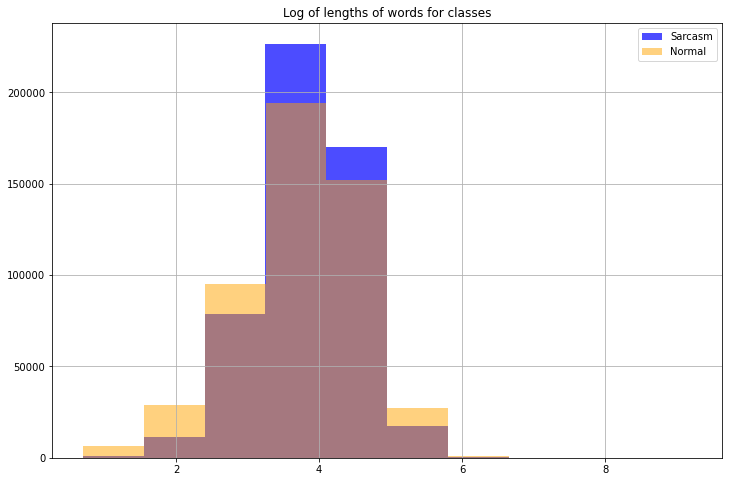

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
data_clean.loc[data_clean.label==1, 'comment'].str.len().apply(np.log1p).hist(label='Sarcasm', alpha=0.7, color='blue')
data_clean.loc[data_clean.label==0, 'comment'].str.len().apply(np.log1p).hist(label='Normal', alpha=0.5, color='orange')
plt.title('Log of lengths of words for classes')
plt.legend()

### Analysis of subreddits

In [20]:
subreddit = data_clean.groupby('subreddit')['label'].agg(
    ['count', 'sum', 'mean']).sort_values(by='count', ascending=False
)
subreddit = subreddit[subreddit['count'] > 3000]
subreddit.sort_values(by='mean', ascending=False)

,count,sum,mean
subreddit,,,
creepyPMs,5466,4287,0.784303
MensRights,3356,2285,0.680870
worldnews,26377,16948,0.642529
atheism,7377,4718,0.639555
TumblrInAction,7516,4583,0.609766
politics,39496,23910,0.605378
news,16891,10193,0.603457
technology,5693,3416,0.600035
europe,4401,2626,0.596683


In [21]:
subreddit.sort_values(by='mean', ascending=True)

,count,sum,mean
subreddit,,,
AskReddit,65677,26367,0.401465
gifs,5267,2168,0.411620
funny,17939,8099,0.451474
WTF,9558,4366,0.456790
Overwatch,4161,1911,0.459265
Showerthoughts,3906,1803,0.461598
The_Donald,9636,4458,0.462640
wow,3674,1701,0.462983
pics,16154,7825,0.484400


In [22]:
subreddit.shape

(46, 3)

Those with higher mean contain more sarcasm commentaries. These are 'worldnews', 'news', 'politics', 'pcmasterrace'

In [23]:
top_subred = subreddit[subreddit['count'] > 3000]
top_subred.head()

,count,sum,mean
subreddit,,,
AskReddit,65677,26367,0.401465
politics,39496,23910,0.605378
worldnews,26377,16948,0.642529
leagueoflegends,21037,11409,0.542330
pcmasterrace,18988,10760,0.566674


### Analysis of Scores

In [24]:
scores_pos = data_clean[data_clean['score'] > 0].groupby('score')['label'].agg(
    ['count', 'sum', 'mean']).sort_values(['mean', 'sum'], ascending=False
)
scores_pos = scores_pos[scores_pos['count'] > 100]
scores_pos.head(5)

,count,sum,mean
score,,,
60,299,170,0.568562
20,3096,1738,0.561370
68,259,145,0.559846
34,1071,596,0.556489
103,108,60,0.555556


In [25]:
print(f"Sarcasm index is {scores_pos['mean'].mean().round(3)} for reddits with scores more than 0")

Sarcasm index is 0.514 for reddits with scores more than 0


In [26]:
scores_zero = data_clean[data_clean['score'] == 0].groupby('score')['label'].agg(
    ['count', 'sum', 'mean']).sort_values(['count', 'sum'], ascending=False
)
print(f"Sarcasm index is {scores_zero['mean'].mean().round(3)} for reddits with scores equal to 0")

Sarcasm index is 0.613 for reddits with scores equal to 0


In [27]:
scores_neg = data_clean[data_clean['score'] < 0].groupby('score')['label'].agg(['count', 'sum', 'mean']).sort_values(['count', 'sum'], ascending=False)
scores_neg = scores_neg[scores_neg['count'] > 100]
scores_neg.head(5)

,count,sum,mean
score,,,
-1,22810,14984,0.656905
-2,11925,8061,0.675975
-3,6738,4555,0.676017
-4,5436,3661,0.673473
-5,4134,2805,0.678520


In [28]:
print(f"Sarcasm index is {scores_neg['mean'].mean().round(3)} for reddits with scores less than 0")

Sarcasm index is 0.668 for reddits with scores less than 0


### Data Transformation

In [29]:
data_most_common = data_clean.value_counts('subreddit')
subreddit_topic = data_most_common[data_most_common > 1000].index.to_list()
subreddit_topic[:5]

['AskReddit', 'politics', 'worldnews', 'leagueoflegends', 'pcmasterrace']

In [30]:
from sklearn.model_selection import train_test_split

df = data_clean[data_clean['subreddit'].isin(subreddit_topic)]
df = df[df['comment'].notna()]
df.head(5)

,label,comment,subreddit,score,parent_comment
0,0,NC and NH.,politics,2,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,-4,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,3,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,deadass don't kill my buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,6,Yep can confirm I saw the tool they use for th...


## Naive Bayes

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(analyzer = 'word')
data_vect = vector.fit_transform(df['comment'])
print(data_vect[:1])

  (0, 70528)	1
  (0, 8188)	1
  (0, 71343)	1


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_vect, df['label'], test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(493745, 116444) (493745,)
(164582, 116444) (164582,)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

nb = MultinomialNB()
r = nb.fit(X_train, y_train)

y_predicted = nb.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64     78722
           1       0.67      0.71      0.69     85860

    accuracy                           0.67    164582
   macro avg       0.67      0.67      0.67    164582
weighted avg       0.67      0.67      0.67    164582



In [34]:
user_input = 'Unless your name is Google, stop acting like you know everything'
user_input = vector.transform([user_input])
nb.predict(user_input)

array([1], dtype=int64)

<AxesSubplot:>

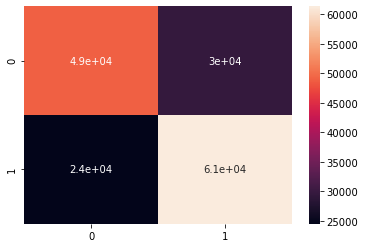

In [35]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)

<img src='gru.PNG' width=600 align='left'>

In [36]:
answers = y_test.to_list() - y_predicted
indexes = y_test.index

test_results = pd.Series(index = indexes, data=answers, name='true_value')
true_negative = test_results[test_results == 1].index.to_list()
false_positive = test_results[test_results == -1].index.to_list()

In [37]:
# test - Sarcasm, predict - Not Sarcasm
df.loc[true_negative]

,label,comment,subreddit,score,parent_comment
678572,1,what a feather in their ~~cap~~ g-strings...,todayilearned,0,I live in Surfers Paradise. They don't feed th...
289147,1,Runic echos for that sweet movement speed.,leagueoflegends,1,As Hecarim jungle do you think its better to g...
542329,1,Is that a FAMAS?,guns,-1,"Seattle, PD. - What does Middle Officer have? ..."
958641,1,How did the police get there so quickly unless...,worldnews,-1,I just count the seconds till the tinfoil hatt...
321806,1,Better buy them up before they go contraband then,GlobalOffensive,3,The lighting strike is basically a stock image...
...,...,...,...,...,...
851408,1,"It in ""the south,"" the place where everything ...",TumblrInAction,2,"Wait, where is this?"
454097,1,It's probably just some other Bernard and Jane...,politics,97,I just saw CNN shame Bernie for going to the V...
852900,1,Maybe they need something new to replace those...,conspiracy,0,"Police in Iowa City With Population of 7,000 A..."
996105,1,I bet you feel bad after reading that NYT arti...,guns,2,My new tricked out Saiga 12


In [38]:
# test - Not Sarcasm, predict - Sarcasm
df.loc[false_positive]

,label,comment,subreddit,score,parent_comment
220001,0,"No, you are.",AskReddit,2,But they're gay.
329004,0,Ah prices are very different from country to c...,pcmasterrace,1,unfortunately i live in EU and the prices i me...
163129,0,And they said government can't create jobs.,politics,1,Trump abandons campaign promise to penalize ou...
240143,0,"""WHY IS AN ANGRY MOB BEATING UP AN APE MAN?""",fivenightsatfreddys,1,*Mom! What is Reddit?*
917272,0,Because Texas,pics,-1,Hmm...wonder why they picked Texas to build th...
...,...,...,...,...,...
108060,0,Nice,2007scape,94,Nice
589490,0,"No, you're just a moron who's being ignorant o...",news,6,"No there isn't, if thier i as you need neq sho..."
968306,0,JEEEEEF,gifs,5,ie: how to pronounce it and not sound like a t...
471929,0,This guy really needs more recognition!,pokemon,2,Pokemon Sun &amp; Moon Secrets (I didn't reali...


## Logistic Regression

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [40]:
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)

logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)

tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.25, random_state=42)

In [42]:
tfidf_logit_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   14.5s finished


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [43]:
valid_pred = tfidf_logit_pipeline.predict(X_test)

In [44]:
# Tfidf Logistic Regression Results
print(classification_report(y_test, valid_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71     78722
           1       0.74      0.71      0.72     85860

    accuracy                           0.72    164582
   macro avg       0.72      0.72      0.72    164582
weighted avg       0.72      0.72      0.72    164582



In [45]:
user_input = input("Your message: ")
valid_pred = tfidf_logit_pipeline.predict([user_input])
valid_pred

Your message: Am I Batman? No


array([0], dtype=int64)

In [46]:
user_input = input("Your message: ")
valid_pred = tfidf_logit_pipeline.predict([user_input])
valid_pred

Your message: I am racist and I love it


array([1], dtype=int64)

## LSTM/ GRU

Too long to train AND not the best performance!

<img src='lstm.PNG' width=600 align='left'>

<a href='https://colab.research.google.com/drive/1HghkpcdX0QPTNVsbfW_MmLG2-3NKUb3Z?usp=sharing'> Link to Google Colab </a>

## Transformers

In [47]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import string

tokenizer = AutoTokenizer.from_pretrained("jkhan447/sarcasm-detection-RoBerta-base-CR")
model = AutoModelForSequenceClassification.from_pretrained("jkhan447/sarcasm-detection-RoBerta-base-CR")

def preprocess_data(text: str) -> str:
    return text.lower().translate(str.maketrans("", "", string.punctuation)).strip()

In [48]:
def predict_sarcasm(user_input, model=model, tokenizer=tokenizer):
    try:    
        tokenized_text = tokenizer([preprocess_data(user_input)], padding=True, truncation=True, max_length=256, 
                                   return_tensors="pt")
        output = model(**tokenized_text)
        probs = output.logits.softmax(dim=-1).tolist()[0]
        return round((0*probs[0]+1*probs[1])*100, 4)
    except:
        return "Some errors. Try again!"

predict_sarcasm('Unless your name is Google, stop acting like you know everything')

99.9998

In [49]:
predict_sarcasm('I applied for university yesterday')

0.013

In [50]:
i = '7'
predict_sarcasm(i)

0.0002

<img src='batsy.PNG' align='left' width=400>

### Testing our test cases

In [52]:
print(text)
predict_sarcasm(text)

Going to Africa today. Hope I don't get AIDS. Joking, I am white!!


99.9998

In [53]:
print(text2)
predict_sarcasm(text2)

My favorite thing to do at 4am is to go to the airport. And yours??


0.0007

In [54]:
print(text3)
predict_sarcasm(text3)

Wow, I really didn’t expect you to pass that exam. Good for you!!!


99.9992

In [55]:
print(text4)
predict_sarcasm(text4)

Thank you for your feedback. It WaS ReAlLy InSIgGhTFul!


99.9202

In [ ]:
import math
text5 = input()

a = predict_sarcasm(text5)
math.ceil(a)

## GUI

In [ ]:
!pip install tk_tools

In [95]:
result = "sarcasm / not sarcasm"

from tkinter import *
import tk_tools

win = Tk()
win.title("Sarcasm Detector")
win.geometry("400x400")
win.resizable(False, False)

lab_1 = Label(win, height=1, font=("TkDefaultFont", 20))
lab_1['text'] = "Detect a sarcasm"

lab_2 = Label(win, height=2, font=("TkDefaultFont", 15))
lab_2['text'] = "Enter a text"

text_1=Text(win,width=70, height=5)

# print(help(text_1))
# print(type(text_1))

lab_3 = Label(win)


def getResult():
    a = math.ceil(predict_sarcasm(text_1.get("1.0", END)))
    if a > 50:
        result = 'sarcasm'
    else:
        result = 'not sarcasm'
    lab_3.config(text="This sentence is probably:\n"+result)
    gauge.set_value(a)

button = Button(win,text="Analyze",relief="raised",overrelief="sunken", width=20, command=getResult)

gauge = tk_tools.Gauge(win, max_value=100.0, label='Sarcasm', unit='%')

lab_1.pack()
lab_2.pack()
text_1.pack()
button.place(x=125, y=180)
gauge.place(x=98, y=270)
lab_3.place(x=130, y=220)

win.mainloop()